In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [3]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_estimated_a["location"] = "A"
X_train_estimated_b["location"] = "B"
X_train_estimated_c["location"] = "C"

In [5]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_train_observed_a["location"] = "A"
X_train_observed_b["location"] = "B"
X_train_observed_c["location"] = "C"

In [148]:
a_features = pd.concat([X_train_estimated_a, X_train_observed_a])
b_features = pd.concat([X_train_estimated_b, X_train_observed_b])
c_features = pd.concat([X_train_estimated_c, X_train_observed_c])

hourAlign = -1
months = [1]

a_features = a_features.rename(columns={"date_forecast" : "time"})
a_features["time"] = a_features["time"] + pd.Timedelta(hours=0)

a = pd.merge(left=train_a, right=a_features, on=["time"], how="inner")

display(a[["pv_measurement", "direct_rad:W"]].corr())


b_features = b_features.rename(columns={"date_forecast" : "time"})
b_features["time"] = b_features["time"] + pd.Timedelta(hours=0)

b = pd.merge(left=train_b, right=b_features, on=["time"], how="inner")

display(b[["pv_measurement", "direct_rad:W"]].corr())

c_features = c_features.rename(columns={"date_forecast" : "time"})
c_features["time"] = c_features["time"] + pd.Timedelta(hours=0)

c = pd.merge(left=train_c, right=c_features, on=["time"], how="inner")

display(c[["pv_measurement", "direct_rad:W"]].corr())


,pv_measurement,direct_rad:W
pv_measurement,1.000000,0.856095
direct_rad:W,0.856095,1.000000


,pv_measurement,direct_rad:W
pv_measurement,1.000000,0.807989
direct_rad:W,0.807989,1.000000


,pv_measurement,direct_rad:W
pv_measurement,1.000000,0.860943
direct_rad:W,0.860943,1.000000


<Axes: title={'center': 'C pv'}, xlabel='hour'>

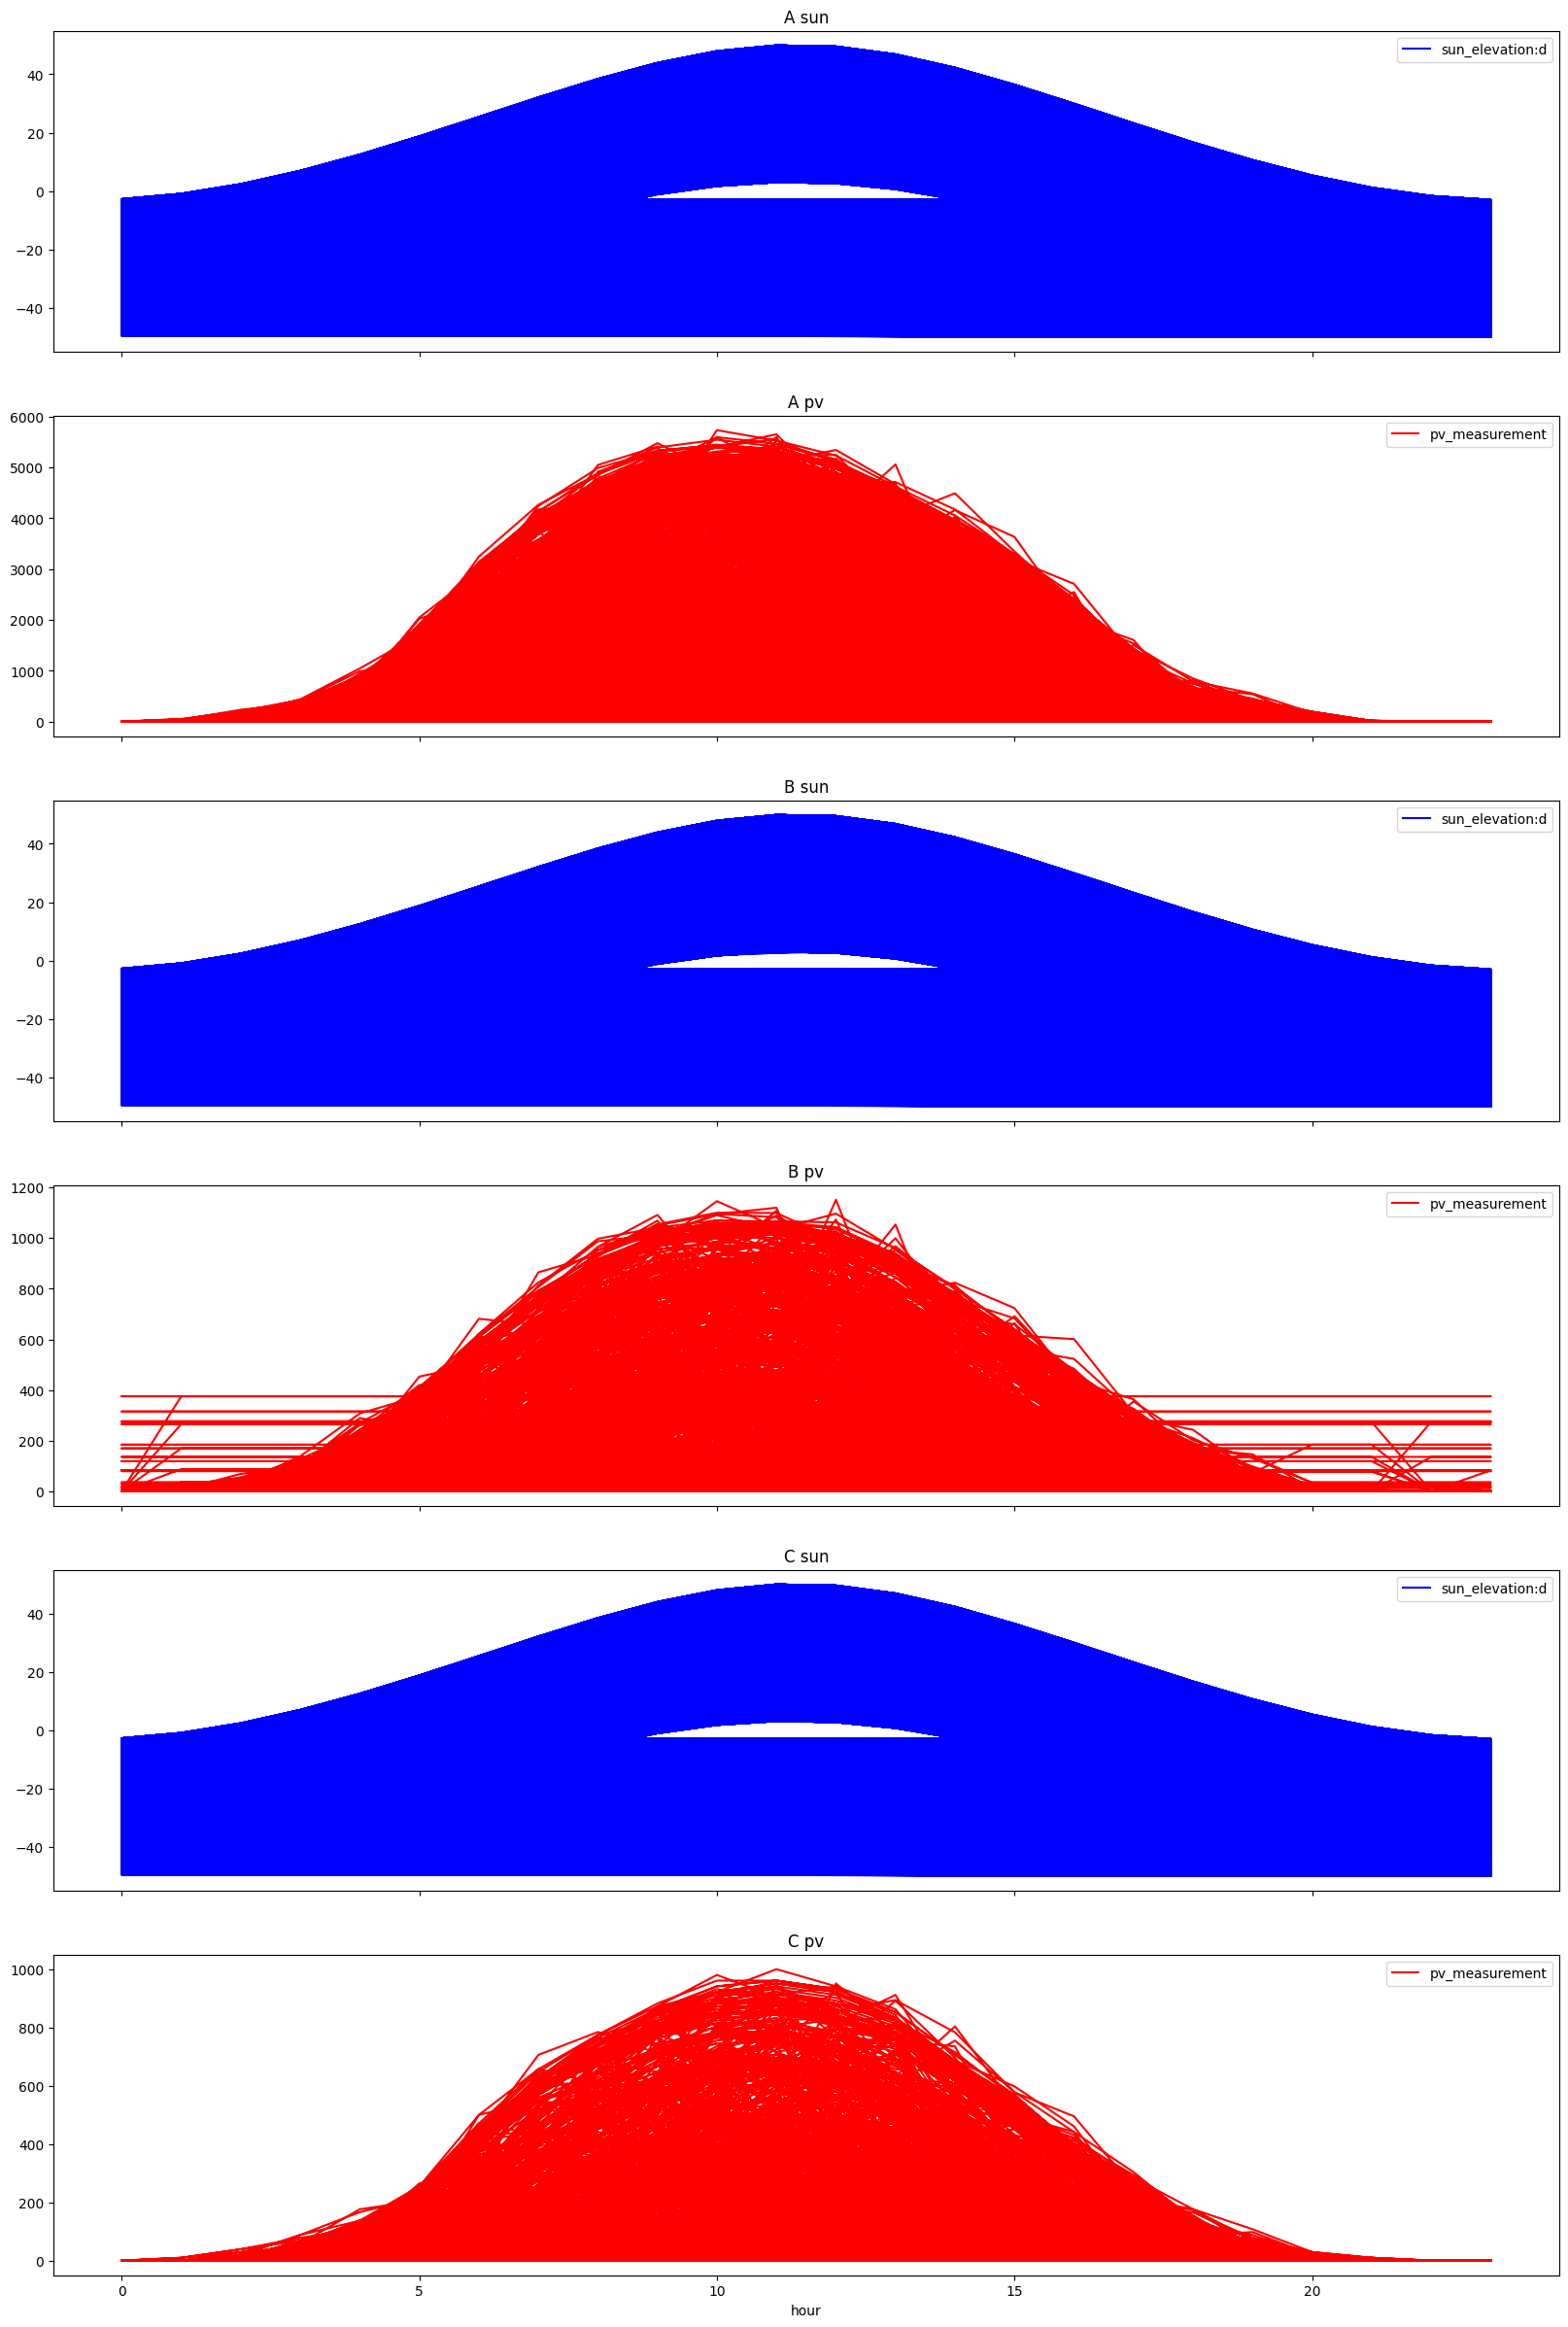

In [149]:

a["hour"] = a["time"].apply(lambda t: t.hour)
b["hour"] = b["time"].apply(lambda t: t.hour)
c["hour"] = c["time"].apply(lambda t: t.hour)
# Plotting a single feature
fig, axs = plt.subplots(6, 1, figsize=(20, 30), sharex=True)

a[['hour', 'sun_elevation:d']].set_index('hour').plot(ax=axs[0], title='A sun', color='blue')
a[['hour', "pv_measurement"]].set_index('hour').plot(ax=axs[1], title='A pv', color='red')
b[['hour', 'sun_elevation:d']].set_index('hour').plot(ax=axs[2], title='B sun', color='blue')
b[['hour', "pv_measurement"]].set_index('hour').plot(ax=axs[3], title='B pv', color='red')
c[['hour', 'sun_elevation:d']].set_index('hour').plot(ax=axs[4], title='C sun', color='blue')
c[['hour', "pv_measurement"]].set_index('hour').plot(ax=axs[5], title='C pv', color='red')
